<h1>Evaluation Techniques for classification models</h1>

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris Dataset (You can use Titanic instead if needed)
data = load_iris()
X = data.data
y = data.target

# For binary classification example, let’s choose only class 0 and 1
import numpy as np
X = X[y != 2]
y = y[y != 2]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
 
data = load_iris()
X = data.data
y = data.target

X=X[y!=2]
y=y[y!=2]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [11]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

<h1>Confusion Matrix</h1>

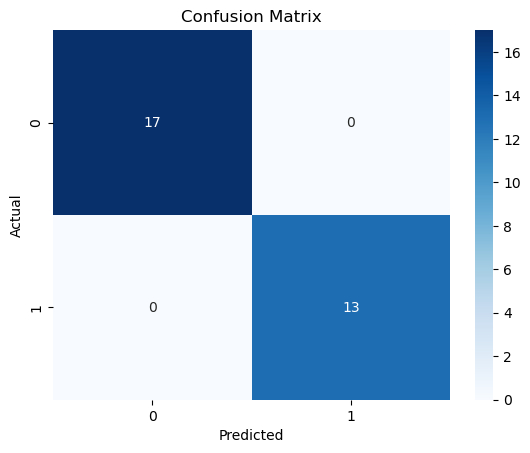

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<h1>Accuracy</h1>

In [28]:
acu = accuracy_score(y_test,y_pred)
acu

1.0

<h1>precision,recall(sensivity),F1_score</h1>

In [45]:
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
Fs = f1_score(y_test,y_pred)
print("precision value is:",pre,"\nrecall value is:",rec,"\nF1_score value is:",Fs)

precision value is: 1.0 
recall value is: 1.0 
F1_score value is: 1.0


<h1>ROC Curve & AUC</h1>

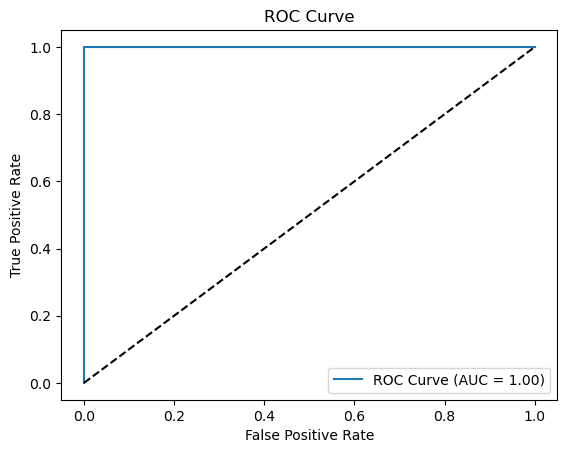

In [48]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


<h1>8.	Cross-Validation</h1>

In [51]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average CV Score: 1.0


<h1>Classification Report</h1>

In [60]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

